Objective: to calculate the latency, which is the time taken by a query between the time it is executed and returns a result.

Methodology:

We have 4 classes of queries (Frequent/Infrequent/Never occurs/Regex).

Frequent query: `grep -c GET, grep -cv Mozilla`

Infrequent query: `grep -c http://thompson-roberts.com/`

Never occurs query: `grep -c 123.163.215.36`

Regex query: `grep -c G[EI]T`

For each query, we execute it 5 times and compute the mean, std deviation etc.

Logs: https://gitlab.engr.illinois.edu/sanjitk3/distributed-grep-system/-/blob/master/grep-client/metrics.log

In [2]:
import pandas as pd
import numpy as np

In [3]:
observation_1 = [1206,1050,1041,1300]
observation_2 = [1191,1049,1027,1222]
observation_3 = [1193,1047,1129,1204]
observation_4 = [1196,1051,1068,1230]
observation_5 = [1186,1057,1031,1425]

df = pd.DataFrame(list(zip(observation_1, observation_2, observation_3, observation_4, observation_5)),
               index =["frequent", "infrequent", "never occurs", "regex"])

df

,0,1,2,3,4
frequent,1206,1191,1193,1196,1186
infrequent,1050,1049,1047,1051,1057
never occurs,1041,1027,1129,1068,1031
regex,1300,1222,1204,1230,1425


In [5]:
freq = [1206, 1191, 1193, 1196, 1186]
infreq = [1050, 1049, 1047, 1051, 1057]
never = [1041, 1027, 1129, 1068, 1031]
regex = [1300, 1222, 1204, 1230, 1425]

df = pd.DataFrame(list(zip(freq, infreq, never, regex)),
               columns =["frequent", "infrequent", "never occurs", "regex"])

df

,frequent,infrequent,never occurs,regex
0,1206,1050,1041,1300
1,1191,1049,1027,1222
2,1193,1047,1129,1204
3,1196,1051,1068,1230
4,1186,1057,1031,1425


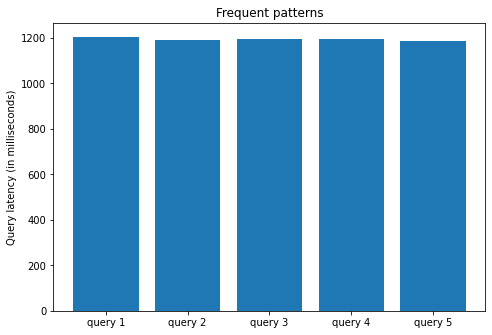

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
queries = ['query 1', 'query 2', 'query 3', 'query 4', 'query 5']
ax.bar(queries,freq)
ax.set_ylabel('Query latency (in milliseconds)')
ax.set_title('Frequent patterns')
plt.show()

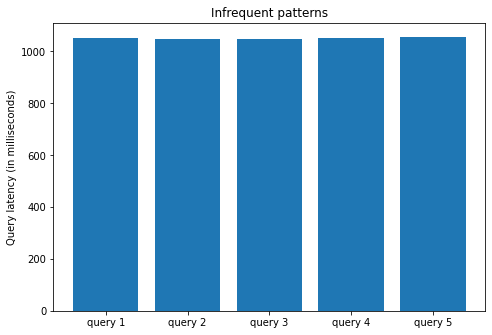

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
queries = ['query 1', 'query 2', 'query 3', 'query 4', 'query 5']
ax.bar(queries,infreq)
ax.set_ylabel('Query latency (in milliseconds)')
ax.set_title('Infrequent patterns')
plt.show()

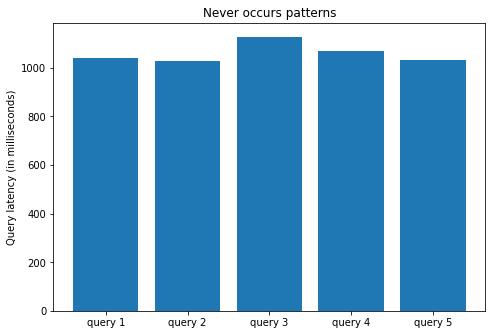

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
queries = ['query 1', 'query 2', 'query 3', 'query 4', 'query 5']
ax.bar(queries, never)
ax.set_ylabel('Query latency (in milliseconds)')
ax.set_title('Never occurs patterns')
plt.show()

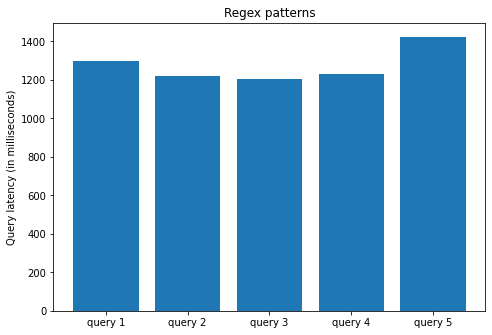

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
queries = ['query 1', 'query 2', 'query 3', 'query 4', 'query 5']
ax.bar(queries,regex)
ax.set_ylabel('Query latency (in milliseconds)')
ax.set_title('Regex patterns')
plt.show()

In [19]:
df.mean()

frequent        1194.4
infrequent      1050.8
never occurs    1059.2
regex           1276.2
dtype: float64

In [12]:
df.std()

frequent         7.436397
infrequent       3.768289
never occurs    42.168709
regex           90.819601
dtype: float64

In [13]:
df.median()

frequent        1193.0
infrequent      1050.0
never occurs    1041.0
regex           1230.0
dtype: float64

In [20]:
query_latency = (1194.4 + 1050.8 + 1059.2 + 1276.2) / 4
query_latency

1145.1499999999999

In [30]:
freq = [1206, 1191, 1193, 1196, 1186, 1194.4, 7.44]
infreq = [1050, 1049, 1047, 1051, 1057, 1050.8, 3.77]
never = [1041, 1027, 1129, 1068, 1031, 1059.2, 42.17]
regex = [1300, 1222, 1204, 1230, 1425, 1276.2, 90.82]

df2 = pd.DataFrame(list(zip(freq, infreq, never, regex)),
               columns =["frequent", "infrequent", "never occurs", "regex"], index=['0', '1', '2', '3', '4', 'mean', 'standard deviation'])

df2

,frequent,infrequent,never occurs,regex
0,1206.00,1050.00,1041.00,1300.00
1,1191.00,1049.00,1027.00,1222.00
2,1193.00,1047.00,1129.00,1204.00
3,1196.00,1051.00,1068.00,1230.00
4,1186.00,1057.00,1031.00,1425.00
mean,1194.40,1050.80,1059.20,1276.20
standard deviation,7.44,3.77,42.17,90.82


In [23]:
df2.mean()

0    1145.15
dtype: float64

In [24]:
df2.std()

0    109.375485
dtype: float64

Conclusion:
Mean query latency across different query categories was found to be 1145.15 milliseconds with a standard deviation of 109.37 milliseconds.

Other observations:

Compute time was found to be constantly despite scale of machine, while latency increased as the size of the data sent between machines also increased.

Below is a scatterplot representing the average query latency for two types of queries (count queries vs line queries). Since line queries returned back huge amounts of text data, the latency observed was much higher.

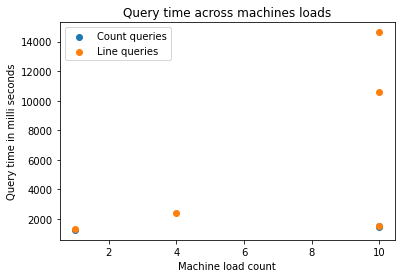

In [ ]:
import matplotlib.pyplot as plt

queryTime1 = [1492,1413,1249]
machineCount1 = [10, 10, 1]
queryTime2 = [10593,14637,1491,1285,2406]
machineCount2 = [10, 10, 10, 1, 4]

ax = plt.axes()

ax.scatter(machineCount1, queryTime1, label='Count queries')
ax.scatter(machineCount2, queryTime2, label='Line queries')
ax.set_title('Query time across machines loads')
ax.set_ylabel('Query time in milli seconds')
ax.set_xlabel('Machine load count')
ax.legend()